## Observations and Insights 

In [68]:
# matplotlib homework assignment for:
# stephen.peters@gmail.com
#
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
print('-----')
print('--- combine the two datasets by mouse ID')
print('-----')
merged_df = pd.DataFrame(merged)

# Display the data table for preview
merged_df.head()


-----
--- combine the two datasets by mouse ID
-----


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
# Checking the number of mice.
#total_transactions = purchase_data.count()[0]
num_mice = mouse_metadata.count()[0]
print('---> number of individual mice in the metadata file  = ' + str(num_mice))

---> number of individual mice in the metadata file  = 249


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# just list data by two columns
#merged_df[['Mouse ID', 'Timepoint']]

# duplicate records by mouse id and timepoint
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
merged_dups_df = merged_df[merged.duplicated(['Mouse ID', 'Timepoint'])]
# count our duplicate records
num_mice_dups = merged_dups_df.count()[0]
print('-------')
print('---> number of duplicated Mouse DI and Timepoint records = ' + str(num_mice_dups))
print('-------')
print('--- All the data from rows with duplicated Mouse ID and Timepoint')
print('-------')
merged_dups_df

-------
---> number of duplicated Mouse DI and Timepoint records = 5
-------
--- All the data from rows with duplicated Mouse ID and Timepoint
-------


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [70]:
# Optional: Get all the data for the duplicate mouse ID. 
print('-------')
print('--- All the data for duplicated Mouse ID records (head)')
print('--- NOTE: the instructions asked for *only* duplicate Mouse ID.')
print('------> the data above is for Mouse ID AND Timepoint')
print('-------')
merged_id_df = merged_df[merged.duplicated(['Mouse ID'])]
# count our duplicate records
num_mice_ID_dups = merged_id_df.count()[0]
print('--- number of rows of records with duplicated Mouse ID = ' + str(num_mice_ID_dups))
# how many records do we have in total?
num_records_total = merged_df.count()[0]
print('--- total number of rows in our dataset = ' + str(num_records_total))
print('-------')
print('-- show the first five of this data:')
merged_id_df.head()


-------
--- All the data for duplicated Mouse ID records (head)
--- NOTE: the instructions asked for *only* duplicate Mouse ID.
------> the data above is for Mouse ID AND Timepoint
-------
--- number of rows of records with duplicated Mouse ID = 1644
--- total number of rows in our dataset = 1893
-------
-- show the first five of this data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

print('')
print('--- dataset cleared of mouse id & timepoint duplicates')
clean_df = merged_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep = 'first')
clean_df.head()


--- dataset cleared of mouse id & timepoint duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice in the clean DataFrame.
# how many records do we have in total?
num_records_clean = clean_df.count()[0]
print('--- total number of rows in our dataset = ' + str(num_records_clean))


--- total number of rows in our dataset = 1888


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# --> the below gives us lots of stats
#clean_df.groupby('Drug Regimen').describe()

# let's rename the Tumor Volume (mm3) column to something friendlier
clean_df = clean_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume"})

# mean tumors by med
print('-- Average Tumor Volume in mm3 by drug regimen')
print('')
meds_tumVol_mean = clean_df.groupby('Drug Regimen')['Tumor Volume'].mean()
print(meds_tumVol_mean)
meds_tumVol_mean_df = pd.DataFrame(meds_tumVol_mean)
meds_tumVol_mean_df = meds_tumVol_mean_df.rename(columns={"Tumor Volume": "Mean"})

# median tumor volumn by med
print('')
print('-- Median Tumor Volume in mm3 by drug regimen')
print('')
meds_tumVol_median = clean_df.groupby('Drug Regimen')['Tumor Volume'].median()
print(meds_tumVol_median)
meds_tumVol_median_df = pd.DataFrame(meds_tumVol_median)
meds_tumVol_median_df = meds_tumVol_median_df.rename(columns={"Tumor Volume": "Median"})

# variance of tumors by med

print('')
print('-- Variance of Tumor Volume in mm3 by drug regimen')
print('')
meds_tumVol_var = clean_df.groupby('Drug Regimen')['Tumor Volume'].var()
print(meds_tumVol_var)
meds_tumVol_var_df = pd.DataFrame(meds_tumVol_var)
meds_tumVol_var_df = meds_tumVol_var_df.rename(columns={"Tumor Volume": "Variance"})

# standard dev of tumors by med
print('')
print('-- Standard deviation of Tumor Volume in mm3 by drug regimen')
print('')
meds_tumVol_std = clean_df.groupby('Drug Regimen')['Tumor Volume'].std()
print(meds_tumVol_std)
meds_tumVol_std_df = pd.DataFrame(meds_tumVol_std)
meds_tumVol_std_df = meds_tumVol_std_df.rename(columns={"Tumor Volume": "Std Deviation"})

# SEM of tumors by med
print('')
print('-- SEM of Tumor Volume in mm3 by drug regimen')
print('')
meds_tumVol_sem = clean_df.groupby('Drug Regimen')['Tumor Volume'].sem()
print(meds_tumVol_sem)
meds_tumVol_sem_df = pd.DataFrame(meds_tumVol_sem)
meds_tumVol_sem_df = meds_tumVol_sem_df.rename(columns={"Tumor Volume": "SEM"})


-- Average Tumor Volume in mm3 by drug regimen

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume, dtype: float64

-- Median Tumor Volume in mm3 by drug regimen

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume, dtype: float64

-- Variance of Tumor Volume in mm3 by drug regimen

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume, dtype: float64

-- Standard devi

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stats_tumVol = pd.concat([meds_tumVol_mean_df, meds_tumVol_median_df,
                         meds_tumVol_var_df, meds_tumVol_std_df, meds_tumVol_sem_df], axis = 1)
print('---')
print('-- Summary Stats: Tumor Volume in mm3 by drug regimen')
print('---')
print(stats_tumVol)

# Using the aggregation method, produce the same summary statistics in a single line
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
print('')
print('---')
print('-- Summary Stats using the agg function: Tumor Volume in mm3 by drug regimen')
print('---')
meds_tumVol_agg = clean_df.groupby('Drug Regimen', as_index=False)['Tumor Volume'].agg({'Mean': 'mean',
                            'Median': 'median', 'Variance': 'var', 'Std Deviation': 'std', 'SEM': 'sem'})
meds_tumVol_agg

---
-- Summary Stats: Tumor Volume in mm3 by drug regimen
---
                   Mean     Median   Variance  Std Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.393463  50.909965  43.138803       6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398

---
-- Summary Stats using the agg function: Tumor Volume in mm3 by drug regimen
---


,Drug Regimen,Mean,Median,Variance,Std Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
meds_count = clean_df.groupby('Drug Regimen')['Mouse ID'].count()

print('--- A list of all the meds')
meds = list(meds_count.index.values)
counts = list(meds_count.values)
meds


--- A list of all the meds


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

 --- revisit and space x lables


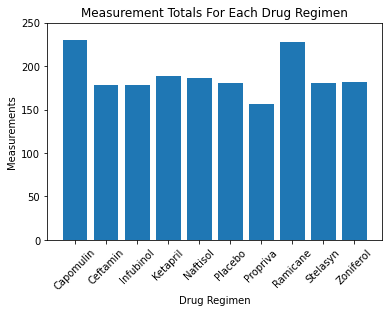

In [76]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
print(' --- revisit and space x lables')
plt.ylim(0, 250)
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.xticks(rotation = 45)
plt.title('Measurement Totals For Each Drug Regimen')
plt.bar(meds, counts)
plt.show()


gender_dist = Sex
Female    930
Male      958
Name: Sex, dtype: int64


<AxesSubplot:title={'center':'Distribution of Female vs. Male Mice'}, ylabel='Sex'>

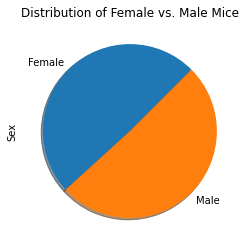

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = clean_df.groupby('Sex')['Sex'].count()
print('gender_dist = ' + str(gender_dist))
plt.title('Distribution of Female vs. Male Mice')
gender_dist.plot.pie(shadow = True, startangle = 45)


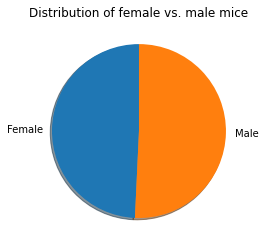

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = list(gender_dist.index.values)

plt.title('Distribution of female vs. male mice')
plt.pie(gender_dist, labels = genders, shadow = True, startangle = 90)
plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

print('-- start by dropping records that don\'t include the meds we are interested in ')
print('')
# this is a dumb way to do this, but I'll clean it up later if I have time
meds_df = clean_df
meds_df = clean_df[clean_df['Drug Regimen'] != 'Ketapril']
meds_df = meds_df[meds_df['Drug Regimen'] != 'Naftisol']
meds_df = meds_df[meds_df['Drug Regimen'] != 'Placebo']
meds_df = meds_df[meds_df['Drug Regimen'] != 'Propriva']
meds_df = meds_df[meds_df['Drug Regimen'] != 'Stelasyn']
meds_df = meds_df[meds_df['Drug Regimen'] != 'Zoniferol']

# seems like something like this should work, but I'm not doing it right.
#remove_list = ['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn','Zoniferol']
#test_df = clean_df[clean_df[['Drug Regimen' != remove_list]

#meds_df
print('--- done!')
print('')

# Start by getting the last (greatest) timepoint for each mouse
print('--- let us start by sorting by mouse ID and then by time point')
print('--- then drop duplicate mouse IDs, keeping the last duplicate')
meds_ltp_df = meds_df.sort_values(by = ['Mouse ID', 'Timepoint'])
meds_ltp_df = meds_ltp_df.drop_duplicates(subset=['Mouse ID'], keep = 'last')

meds_ltp_df



-- start by dropping records that don't include the meds we are interested in 

--- done!

--- let us start by sorting by mouse ID and then by time point
--- then drop duplicate mouse IDs, keeping the last duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [42]:
# this cell intentionally left blank

In [86]:
# Put treatments into a list for for loop (and later for plot labels)
print('-- list of drug regimes')

#meds_count = meds_ltp_df.groupby('Drug Regimen')['Mouse ID'].count()
#print(meds_count)

# this is the dumb way to do this, fix it later if I have time
meds_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
print(meds_list)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
print('')
print('--- calculate our quartiles and IQR')
print('')
quartiles = meds_ltp_df['Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

    

-- list of drug regimes
['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

--- calculate our quartiles and IQR

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [44]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
print('---')
print('- now we compute stats for the individual meds')
print('')
print('-- separate df by med')
print('')
# snitched from: https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
med_capo_df = meds_ltp_df.loc[meds_ltp_df['Drug Regimen'] == 'Capomulin']
med_ceft_df = meds_ltp_df.loc[meds_ltp_df['Drug Regimen'] == 'Ceftamin']
med_infu_df = meds_ltp_df.loc[meds_ltp_df['Drug Regimen'] == 'Infubinol']
med_rami_df = meds_ltp_df.loc[meds_ltp_df['Drug Regimen'] == 'Ramicane']

print('--- done!')
#med_rami_df

---
- now we compute stats for the individual meds

-- separate df by med

--- done!


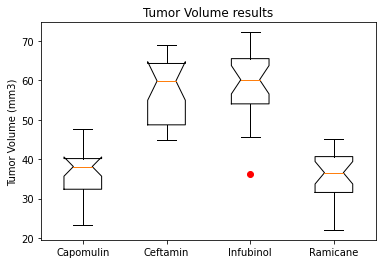

In [89]:
# let's make a box plot, shall we?
#print('--- tumor volumes gathering ---')
capo_tumvol_list = med_capo_df['Tumor Volume'].values.tolist()
ceft_tumvol_list = med_ceft_df['Tumor Volume'].values.tolist()
infu_tumvol_list = med_infu_df['Tumor Volume'].values.tolist()
rami_tumvol_list = med_rami_df['Tumor Volume'].values.tolist()

four_meds_lists = [capo_tumvol_list, ceft_tumvol_list, infu_tumvol_list, rami_tumvol_list]

#print(four_meds_lists)

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume results')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(four_meds_lists,'MarkerColor','red')
plt.xticks([1, 2, 3, 4], meds_list, rotation=0)
plt.show()

In [46]:
    # add subset 
print('')
print('--- calculate our quartiles and IQR for our individual drug regimens')
print('---')
print('--- the instructions ask for these, apparently per drug regimen, so here they are')
print('---')
print('--- if I have time, perhaps I\'ll find a way to do this more programatically')
print('')
capo_quartiles = med_capo_df['Tumor Volume'].quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq

print('-- Results for Capomulin')
print(f"The lower quartile of tumor volume is: {capo_lowerq}")
print(f"The upper quartile of tumor volume is: {capo_upperq}")
print(f"The interquartile range of tumor volume is: {capo_iqr}")
print(f"The the median of tumor volume is: {capo_quartiles[0.5]} ")

capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
print(f"Values below {capo_lower_bound} could be outliers.")
print(f"Values above {capo_upper_bound} could be outliers.")
    
    # Determine outliers using upper and lower bounds


--- calculate our quartiles and IQR for our individual drug regimens
---
--- the instructions ask for these, apparently per drug regimen, so here they are
---
--- if I have time, perhaps I'll find a way to do this more programatically

-- Results for Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [47]:
print('')
ceft_quartiles = med_ceft_df['Tumor Volume'].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

print('-- Results for Ceftamin')
print(f"The lower quartile of tumor volume is: {ceft_lowerq}")
print(f"The upper quartile of tumor volume is: {ceft_upperq}")
print(f"The interquartile range of tumor volume is: {ceft_iqr}")
print(f"The the median of tumor volume is: {ceft_quartiles[0.5]} ")

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")


-- Results for Ceftamin
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [48]:
print('')
infu_quartiles = med_infu_df['Tumor Volume'].quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq

print('-- Results for Infubinol')
print(f"The lower quartile of tumor volume is: {infu_lowerq}")
print(f"The upper quartile of tumor volume is: {infu_upperq}")
print(f"The interquartile range of tumor volume is: {infu_iqr}")
print(f"The the median of tumor volume is: {infu_quartiles[0.5]} ")

infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
print(f"Values below {infu_lower_bound} could be outliers.")
print(f"Values above {infu_upper_bound} could be outliers.")


-- Results for Infubinol
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [49]:
print('')
rami_quartiles = med_rami_df['Tumor Volume'].quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq

print('-- Results for Ramicane')
print(f"The lower quartile of tumor volume is: {rami_lowerq}")
print(f"The upper quartile of tumor volume is: {rami_upperq}")
print(f"The interquartile range of tumor volume is: {rami_iqr}")
print(f"The the median of tumor volume is: {rami_quartiles[0.5]} ")

rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
print(f"Values below {rami_lower_bound} could be outliers.")
print(f"Values above {rami_upper_bound} could be outliers.")


-- Results for Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# this was done above

## Line and Scatter Plots

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
print('')
print('-- Let\'s get a single mouse treated with Capomulin')
capo_only_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capo_mouse_df = capo_only_df.loc[capo_only_df['Mouse ID'] == 's185']
capo_mouse_df


-- Let's get a single mouse treated with Capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


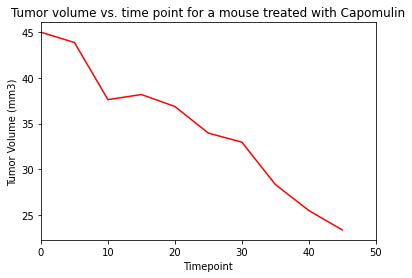

In [94]:
# let's get our X and Y values:
y_tum_vol = capo_mouse_df['Tumor Volume'].values.tolist()
x_time_p = capo_mouse_df['Timepoint'].values.tolist()

# Plot the world average as a line chart
line, = plt.plot(x_time_p, y_tum_vol, color="red" )

# Show the chart
plt.title('Tumor volume vs. time point for a mouse treated with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xlim([0,50])
plt.show()


In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# capo_only_df is only capomulin datapoints

# find average tumor volume per mouse
ave_tum = capo_only_df.groupby('Mouse ID')
ave_tum = ave_tum['Tumor Volume'].mean()
ave_tum_df = pd.DataFrame(ave_tum)

# drop duplicate Mouse ID's 
mice = capo_only_df.drop_duplicates(['Mouse ID'])
mouse_weight = mice[['Mouse ID', 'Weight (g)']]

# let's merge
data_merged = pd.merge(ave_tum_df, mouse_weight, on=['Mouse ID'])
print('--- and now we have Mouse ID, Ave Tumor Volume and Weight')
data_merged


--- and now we have Mouse ID, Ave Tumor Volume and Weight


,Mouse ID,Tumor Volume,Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22
5,i557,44.805810,24
6,i738,39.141053,20
7,j119,44.465236,23
8,j246,43.216925,21
9,l509,44.434474,21


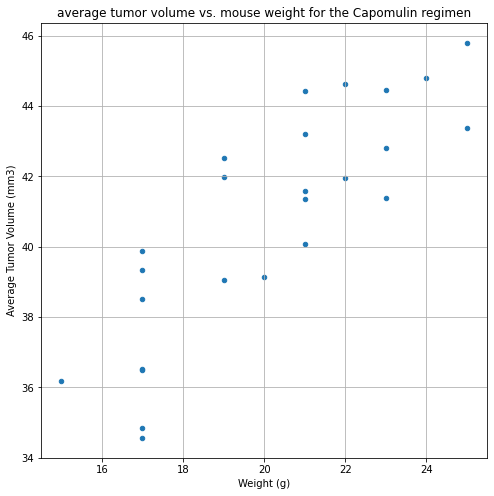

In [54]:
# now we can scatter plot


# Create a scatter plot which compares average tumor volume vs. mouse weight
data_merged.plot(kind="scatter", x="Weight (g)", y="Tumor Volume", grid=True, figsize=(8,8),
              title="average tumor volume vs. mouse weight for the Capomulin regimen")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = data_merged['Weight (g)']
y = data_merged['Tumor Volume']
print(f' The correlation coefficient between Tumor Weight and Tumor Volume is {round(st.pearsonr(x, y)[0],2)}')


 The correlation coefficient between Tumor Weight and Tumor Volume is 0.84


In [60]:
# get our line
# Let's do our linear regression on tumor volume versus mouse weight
data_slope, data_int, data_r, data_p, data_std_err = st.linregress(x, y)
# create our line equation
data_fit = data_slope * x + data_int

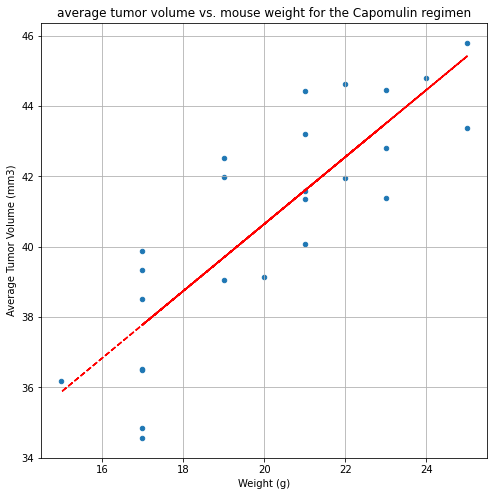

In [95]:
# Create a scatter plot which compares average tumor volume vs. mouse weight
data_merged.plot(kind="scatter", x="Weight (g)", y="Tumor Volume", grid=True, figsize=(8,8),
              title="average tumor volume vs. mouse weight for the Capomulin regimen")
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x, data_fit, '--', color='red')
plt.show()

In [132]:
# Observations based on data analysis
print('\033[31m--------')
print('Observation #1')
print('Based on our results, if I was a mouse with skin cancer, I\'d request the Ramicane.')
print('Of the four drug regimens analyzed, the Ramicane appears to do the best at ')
print('reducing tumor volume with the Capomulin a close second.')
print('')
print('Observation #2')
print('Our scatter plot and regression analysis shows a clear trend of average tumor volume ')
print('increasing with mouse weight.')
print('')
print('Observation #3')
print('Looking at Tumor volume vs. time point for a single mouse treated with Capomulin,')
print('this seems to be good news for the test subject as the tumor volume has gone to ')
print('close to zero by the last time point.')
print('--------')
TGREEN =  '\033[32m' # Green Text
print (TGREEN + "Thank you to all the mice who gave their lives!")
ENDC = '\033[m' # reset to the defaults
print ( ENDC, '')


--------
Observation #1
Based on our results, if I was a mouse with skin cancer, I'd request the Ramicane.
Of the four drug regimens analyzed, the Ramicane appears to do the best at 
reducing tumor volume with the Capomulin a close second.

Observation #2
Our scatter plot and regression analysis shows a clear trend of average tumor volume 
increasing with mouse weight.

Observation #3
Looking at Tumor volume vs. time point for a single mouse treated with Capomulin,
this seems to be good news for the test subject as the tumor volume has gone to 
close to zero by the last time point.
--------
Thank you to all the mice who gave their lives!
 
